# Exercise 2 - Shor's algorithm
This notebook contains my solution to exercise 2 of the IBM Quantum Challenge 2021. My solution is pretty simple and has a total cost of 6. My name is Emilio Peláez and my GitHub profile is [@epelaaez](https://github.com/epelaaez) if you want to check it out!

### Imports
The next cell imports everything needed for this notebook.

In [13]:
from qiskit import QuantumRegister, QuantumCircuit, transpile
import numpy as np

### Solution
The first circuit we had to composed needed to perform the following transformation:

$$
\begin{aligned}
U|00\rangle &= |01\rangle \\
U|01\rangle &= |10\rangle \\
U|10\rangle &= |11\rangle \\
U|11\rangle &= |00\rangle \\
\end{aligned}
$$

And remember that the $U$ matrix is controlled by another qubit. Thus, the control qubit below dictates if the transformation $U$ is applied to the two target qubits. It can be seen righ away that these can be done with two controlled operations. First, we see that $U$ flips the second target qubit if the first target qubit is in the 1 state. To perform this, we use a Toffoli gate with the control qubit and first target qubit as control and the second target qubit as target. The reason to do this is that we want to activate $U$ if and only if the control qubit is in state 1, thus the extra control. Then, we see that the first target qubit is always flipped, we do this using a CNOT gate. We do this last to not mess up the first control operation.

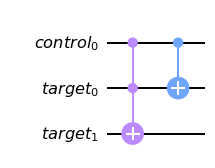

In [4]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

cu.ccx(0, 1, 2)
cu.cx(0,1)

cu.draw('mpl')

In [5]:
from qc_grader import grade_ex2a
grade_ex2a(cu)

Grading your answer for ex2/part1. Please wait...

Congratulations 🎉! Your answer is correct.


As you can see, this circuit works. The next part asked us to build a circuit that performs the following transformation:

$$
\begin{aligned}
V|00\rangle &= |10\rangle \\
V|01\rangle &= |11\rangle \\
V|10\rangle &= |00\rangle \\
V|11\rangle &= |01\rangle \\
\end{aligned}
$$

This circuit was even easier to build. Notice that the first target qubit is always remained unchanged and the second one is always fliped. Therefore, a single CNOT using the qubit that activates $V$ as control and the second target qubit as target suffices.

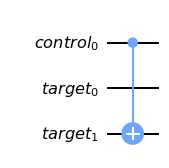

In [8]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

cu2.cx(0,2)

cu2.draw('mpl')

In [9]:
from qc_grader import grade_ex2b
grade_ex2b(cu2)

Grading your answer for ex2/part2. Please wait...

Congratulations 🎉! Your answer is correct.


Again, this circuit is accepted by the grader. The last part asks us to build a circuit that performs the following transformation:

$$
\begin{aligned}
W|00\rangle &= |00\rangle \\
W|01\rangle &= |01\rangle \\
W|10\rangle &= |10\rangle \\
W|11\rangle &= |11\rangle \\
\end{aligned}
$$

This was the easiest one. You can easily see that $W$ is simply the identity. Thus, no gates need to be added.

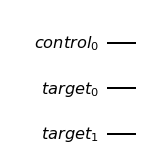

In [10]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

cu4.draw('mpl')

In [11]:
from qc_grader import grade_ex2c
grade_ex2c(cu4)

Grading your answer for ex2/part3. Please wait...

Congratulations 🎉! Your answer is correct.


This circuit also works. Next, we simply combine the three parts and unroll it to submit our solution.

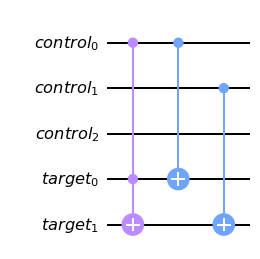

In [12]:
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
cux.draw('mpl')

In [14]:
from qc_grader import grade_ex2_final
cux = transpile(cux, basis_gates=['cx','u'])
grade_ex2_final(cux)

Grading your answer for ex2/part4. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 6.
Feel free to submit your answer.



And you can see that our whole answer is correct and gives us cost 6.